### 衡量线性回归算法的标准

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 衡量标准  均方误差
### $$ \frac{1}{m}\sum_{i=1}^{m}{(y_i - \bar{y_i})^2 }$$
### <center>MSE(Mean Squared Error)</center>

### 改进均方根误差
### $$ \sqrt{\frac{1}{m}\sum_{i=1}^{m}{(y_i - \bar{y_i})^2 }} = \sqrt{MSE}$$
### <center>RMSE(Root Mean Squared Error)</center>

### 平均绝对误差MAE
### $$ \frac{1}{m}\sum_{i=1}^{m}{|y_i - \bar{y_i}|}$$
### <center>MAE(Mean Absolute Error)</center>

### 加载波士顿房价数据

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR) # 查看简略信息

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.feature_names # 查看属性

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = boston.data[:,5] # 只使用房间数量这个特征，也就是第5列数据
x

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [6]:
x.shape

(506,)

In [7]:
y = boston.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
y.shape

(506,)

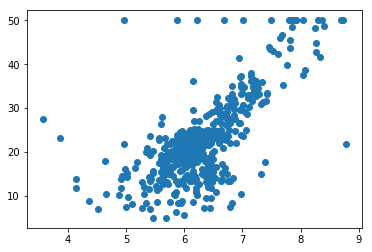

In [9]:
plt.scatter(x,y)
plt.show()

In [10]:
np.max(y)

50.0

In [11]:
x = x[y < 50.0] # x取小于50的点
y = y[y < 50.0] # y也取小于50的点

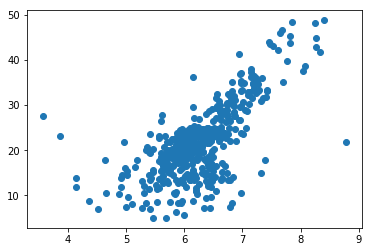

In [12]:
plt.scatter(x,y)
plt.show()

### 使用简单线性回归法

In [13]:
from model_selection import train_test_split

In [14]:
x_train,y_train,x_test,y_test = train_test_split(x,y,seed=666)

In [15]:
x_train.shape

(392,)

In [16]:
x_test.shape

(98,)

In [17]:
from SimpleLinearRegression import SimpleLinearRegression2 # 使用向量化

ImportError: attempted relative import with no known parent package

In [ ]:
reg = SimpleLinearRegression2()
reg.fit(x_train,y_train)

In [ ]:
reg.a_

In [ ]:
reg.b_

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='r')
plt.show()

In [ ]:
y_predict = reg.predict(x_test)
y_predict

### MSE

In [ ]:
mes_test = np.sum((y_predict - y_test) ** 2) / len(y_test) # 指标运算

In [ ]:
mes_test 

### RMSE

In [ ]:
from math import sqrt

rmse_test = sqrt(mes_test)
rmse_test

### MAE

In [ ]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test) # 取出插差值的绝对值
mae_test

In [ ]:
from metrics import mean_absolute_error
from metrics import root_mean_squared_error
from metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_predict)

In [ ]:
root_mean_squared_error(y_test,y_predict)

In [ ]:
mean_absolute_error(y_test,y_predict)

### scikit-learn 中的MSM和MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_predict)

In [ ]:
mean_absolute_error(y_test,y_predict)

### 最好的衡量线性回归法的指标:R Squared

### $$R^2 = 1 - \frac{SS_r(Residual-Sum-of-Squares)}{SS_t(Total-Sum-of-Squares)} = 1 - \frac{\sum_{i}{(\hat{y_i} - y_i)^2}}{\sum_{i}{(\bar{y} - y_i)^2}}$$

### $$1 - \frac{\sum_{i}{(\hat{y_i} - y_i)^2}}{\sum_{i}{(\bar{y} - y_i)^2}} = 1 - \frac{\sum_{i=1}^{m}{((\hat{y_i} - y_i)^2) / m}}{\sum_{i=1}^{m}{((\bar{y} - y_i)^2) / m}} = 1 - \frac{MSE(\hat{y},y)}{Var(y)}$$ 

In [ ]:
1 - mean_squared_error(y_test,y_predict) / np.var(y_test)

In [ ]:
from metrics import r2_score

In [ ]:
r2_score(y_test,y_predict)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predict)

In [ ]:
reg.score(x_test,y_test)